In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [76]:
df = pd.read_csv(r"data/sales_data_refined.csv")
# Testing reading in csv
df.head()

,QUANTITYORDERED,PRICEEACH,CUSTOMERNAME,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CITY,STATE,COUNTRY,DEALSIZE
0,30,95.70,Land of Toys Inc.,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,NYC,NY,USA,Small
1,34,81.35,Reims Collectables,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims,NaN,France,Small
2,41,94.74,Lyon Souveniers,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Paris,NaN,France,Medium
3,45,83.26,Toys4GrownUps.com,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Pasadena,CA,USA,Medium
4,49,100.00,Corporate Gift Ideas Co.,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,San Francisco,CA,USA,Medium


In [77]:
# Changing column names to lower case again
df.rename(str.lower, axis='columns', inplace=True)

In [78]:
# Checking this has worked
df.head()

,quantityordered,priceeach,customername,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,city,state,country,dealsize
0,30,95.70,Land of Toys Inc.,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,NYC,NY,USA,Small
1,34,81.35,Reims Collectables,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,Reims,NaN,France,Small
2,41,94.74,Lyon Souveniers,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,Paris,NaN,France,Medium
3,45,83.26,Toys4GrownUps.com,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,Pasadena,CA,USA,Medium
4,49,100.00,Corporate Gift Ideas Co.,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,San Francisco,CA,USA,Medium


## 1. Display a ranked list of the countries with most to least sales

In [80]:
ranked_sales_per_country = df.groupby('country')['sales'].sum().sort_values(ascending=False)
ranked_sales_per_country

country
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: sales, dtype: float64

## 2. Display a bar chart showing sales per country, ranked highest to lowest

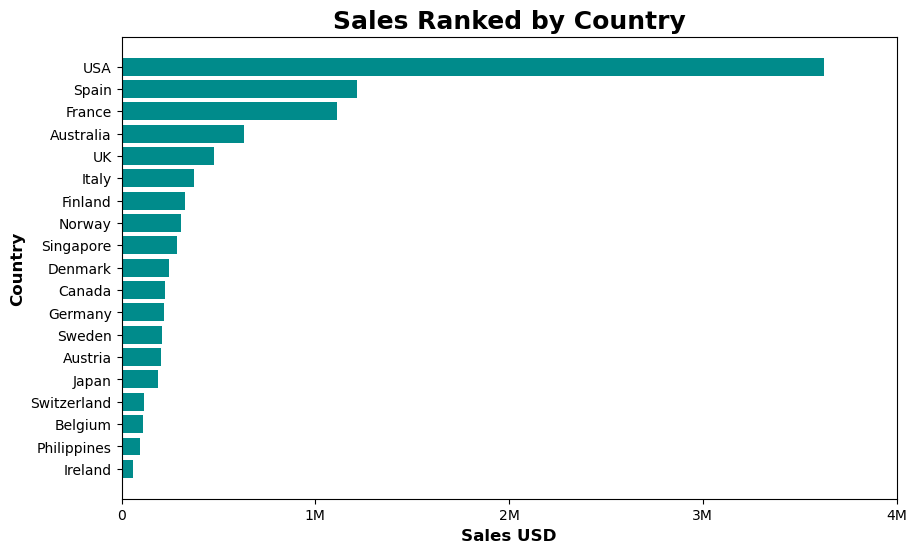

In [82]:
# set plot size
plt.figure(figsize=(10,6))

# give plot data
plt.barh(ranked_sales_per_country.index, ranked_sales_per_country.values, color="DarkCyan")

# set x and y labels
plt.xlabel('Sales USD', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')

# set x ticks (the measurements along the x axis)
xticks = [0, 1e6, 2e6, 3e6, 4e6]
xlabels = ['0', '1M', '2M', '3M', '4M']
plt.xticks(xticks, xlabels)

# give plot a title
plt.title('Sales Ranked by Country', fontsize=18, fontweight='bold')

# invert y axis values to show highest sales first
plt.gca().invert_yaxis()

# save graph 
plt.savefig('graphs/sales_ranked_per_country.png')

# show graph
plt.show()

## 3. Show how the different deal sizes (small, medium, large) make up the total sales in the top 5 selling countries 

In [85]:
# Get the top 5 selling countries from previous df used in bar chart
top_5_countries_by_sales = ranked_sales_per_country[:5]
top_5_countries_by_sales

country
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: sales, dtype: float64

In [86]:
# put these countries and their corresponding sales in a new df
top_countries = top_5_countries_by_sales.index
top_sales_per_country = top_5_countries_by_sales.values
dealsize_per_country_df = pd.DataFrame({'country': top_countries, 'total_sales': top_sales_per_country})

# add small, medium and large columns and initialise their values to 0
initial_values = np.zeros(5)
dealsize_per_country_df['large'] = initial_values
dealsize_per_country_df['medium'] = initial_values
dealsize_per_country_df['small'] = initial_values
dealsize_per_country_df


,country,total_sales,large,medium,small
0,USA,3627982.83,0.0,0.0,0.0
1,Spain,1215686.92,0.0,0.0,0.0
2,France,1110916.52,0.0,0.0,0.0
3,Australia,630623.10,0.0,0.0,0.0
4,UK,478880.46,0.0,0.0,0.0


In [87]:
# get the values for the total sales per small, medium and large dealsizes per country and put these in the above df 
dealsizes = df['dealsize'].unique().tolist() # ['Small', 'Medium', 'Large']

# converts to lower case, to ensure consistency with column names
dealsizes = [dealsize.lower() for dealsize in dealsizes]

# loops through all top selling countries
for country in top_countries:
        # temp variable to store total sales per each dealsize type
        temp = df[df['country'] == country].groupby('dealsize')['sales'].sum()
        # converting dealsize index labels to lowercase to match column names
        temp.index = temp.index.str.lower()

        # looping over each dealsize type
        for dealsize in dealsizes:
            # getting the value of the total amount of sales per dealsize
            value = temp.loc[dealsize]
            # setting the row for the corresponding country and dealtype to the total sales value
            # ie. setting the row for 'USA', 'large' to the total of all sales from large dealsizes
            dealsize_per_country_df.loc[dealsize_per_country_df['country'] == country, dealsize] = value
            
dealsize_per_country_df   



,country,total_sales,large,medium,small
0,USA,3627982.83,527702.38,2208362.16,891918.29
1,Spain,1215686.92,141042.51,757927.09,316717.32
2,France,1110916.52,179004.87,643606.22,288305.43
3,Australia,630623.10,60252.04,381245.00,189126.06
4,UK,478880.46,35155.24,301233.02,142492.20


In [88]:
# setting up variables for easy use in graph
countries = dealsize_per_country_df['country'].tolist()
small_sales = dealsize_per_country_df['small'].tolist()
medium_sales = dealsize_per_country_df['medium'].tolist()
large_sales = dealsize_per_country_df['large'].tolist()


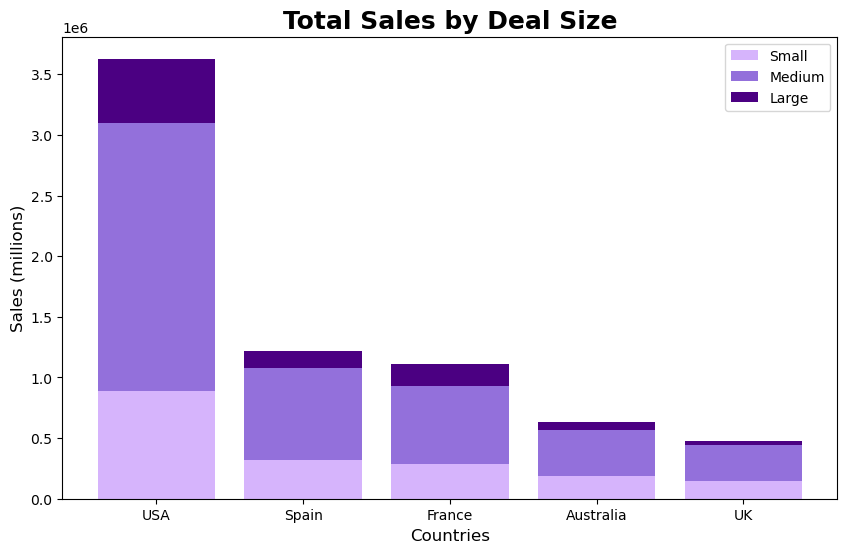

In [89]:
# set x axis
x = countries

# set size of graph
plt.figure(figsize=(10,6))

# plot small, medium and large bars on top of each other
plt.bar(x, small_sales, label="Small", color="#d6b4fc")
plt.bar(x, medium_sales, bottom= small_sales, label="Medium", color="mediumpurple")
# need to do this so that the graph knows where medium ends and large should begin
bottom_large = np.add(small_sales, medium_sales).tolist()
plt.bar(x, large_sales,  bottom=bottom_large,  label="Large", color="indigo")
# setting xlabel, ylabel, title and legend
plt.xlabel("Countries",  fontsize=12)
plt.ylabel("Sales (millions)",  fontsize=12)
plt.legend()
plt.title("Total Sales by Deal Size", fontsize=18, fontweight='bold')
plt.savefig('graphs/sales_by_deal_size.png')
plt.show()

##  4. Compare the sales trends over time in the UK in 2003 and 2004

In [91]:
# only get records relating to the US
sales_us = df[df['country'] == 'USA']

years = [2003, 2004]
sales03_04 = sales_us[sales_us['year_id'].isin(years)]

# group by year and month
sales_over_time = sales03_04.groupby(['year_id', 'month_id'])['sales'].sum()

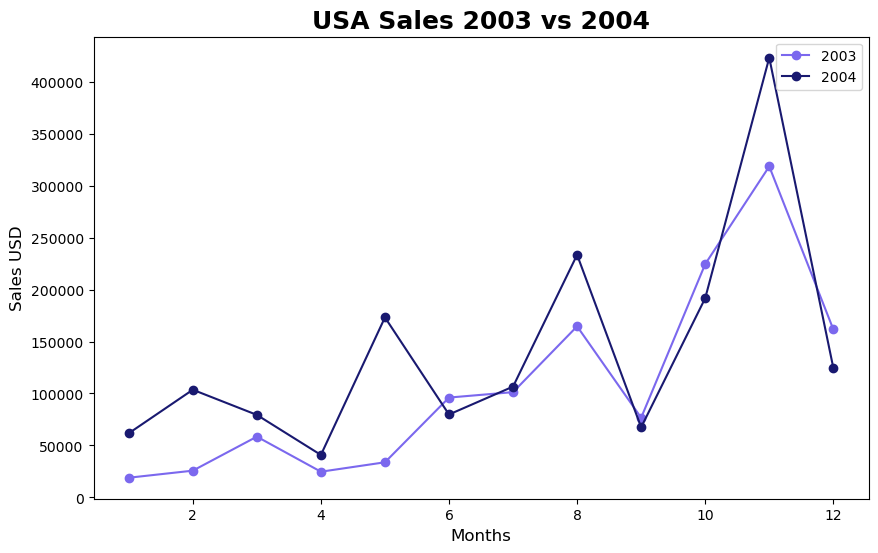

In [92]:
sales_values03 = sales_over_time[2003].values
sales_values04 = sales_over_time[2004].values

# set size of graph
plt.figure(figsize=(10,6))

# set x axis values to 1-12
x = np.arange(1, 13)

# plot 2003 sales on 1 line
plt.plot(x, sales_values03, color='mediumslateblue', label='2003',  marker = 'o')

# plot 2004 sales on 2nd line
plt.plot(x, sales_values04, color='midnightblue', label='2004',  marker = 'o')

# label x and y axis, title and set legend
plt.xlabel("Months", fontsize=12)  
plt.ylabel("Sales USD", fontsize=12)  
plt.title("USA Sales 2003 vs 2004", fontsize=18, fontweight='bold') 
plt.legend()

# save graph
plt.savefig('graphs/sales03_vs_sales04US.png')

plt.show()

 ## 5. Show the sales revenue of different product lines in the US

In [94]:
productline_rev = sales_us.groupby('productline')['sales'].sum().sort_values(ascending=False)
prodline_labels = productline_rev.index
prodline_rev = productline_rev.values
productline_rev

productline
Classic Cars        1344638.22
Vintage Cars         757755.90
Motorcycles          520371.70
Trucks and Buses     397842.42
Planes               328432.89
Ships                209688.14
Trains                69253.56
Name: sales, dtype: float64

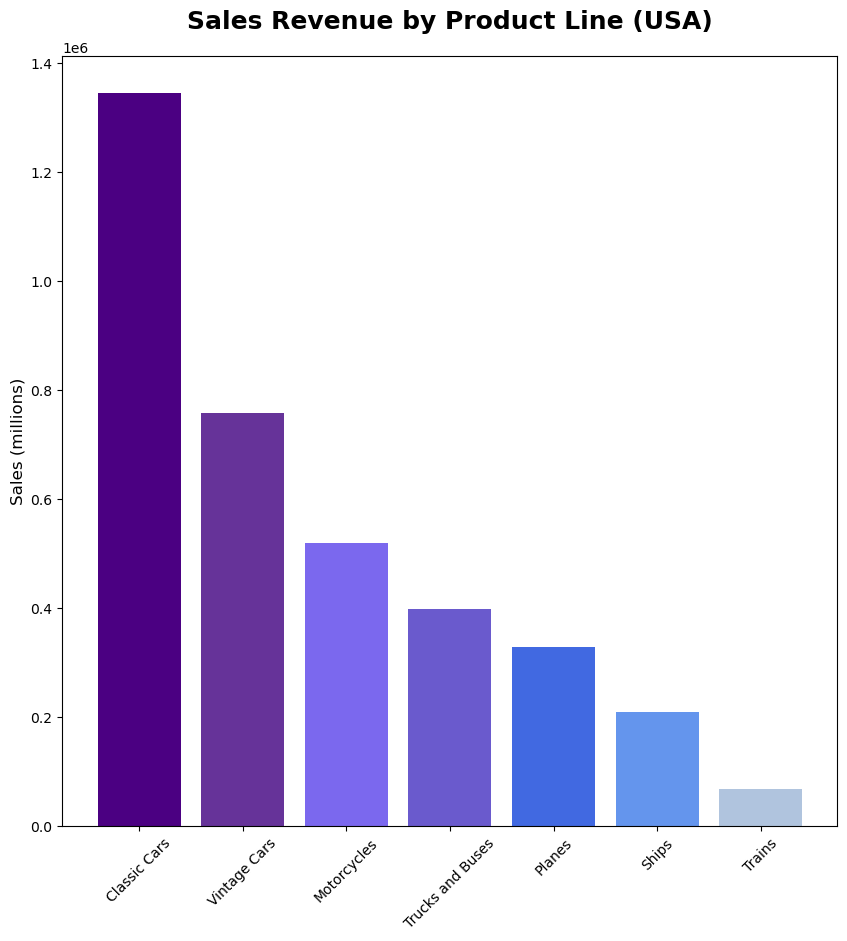

In [252]:

# set size of graph
plt.figure(figsize=(10,10))

# specify color palette for bars
colors=['indigo', 'rebeccapurple', 'mediumslateblue', 'slateblue', 'royalblue', 'cornflowerblue', 'lightsteelblue']

# plot bars
plt.bar(prodline_labels, prodline_rev, color=colors)

# rotate xticks 45 degrees
plt.xticks(rotation=45)

#set  ylabel & title
plt.ylabel("Sales (millions)", fontsize=12)
plt.title("Sales Revenue by Product Line (USA)", fontsize=18, fontweight='bold', pad=20)

#save graph
plt.savefig('graphs/sales_by_productline.png')
plt.show()

## 6. Who are the top 10 customers whose orders make the most money?

In [271]:
top_10 = df.groupby('customername')['sales'].sum().sort_values(ascending=False)[:10].reset_index()
top_10.index = np.arange(1, 11)
top_10 

,customername,sales
1,Euro Shopping Channel,912294.11
2,Mini Gifts Distributors Ltd.,654858.06
3,"Australian Collectors, Co.",200995.41
4,Muscle Machine Inc,197736.94
5,La Rochelle Gifts,180124.90
6,"Dragon Souveniers, Ltd.",172989.68
7,Land of Toys Inc.,164069.44
8,The Sharp Gifts Warehouse,160010.27
9,"AV Stores, Co.",157807.81
10,"Anna's Decorations, Ltd",153996.13


## 7. Show the Percentage Share of Revenue from Top 3 Customers

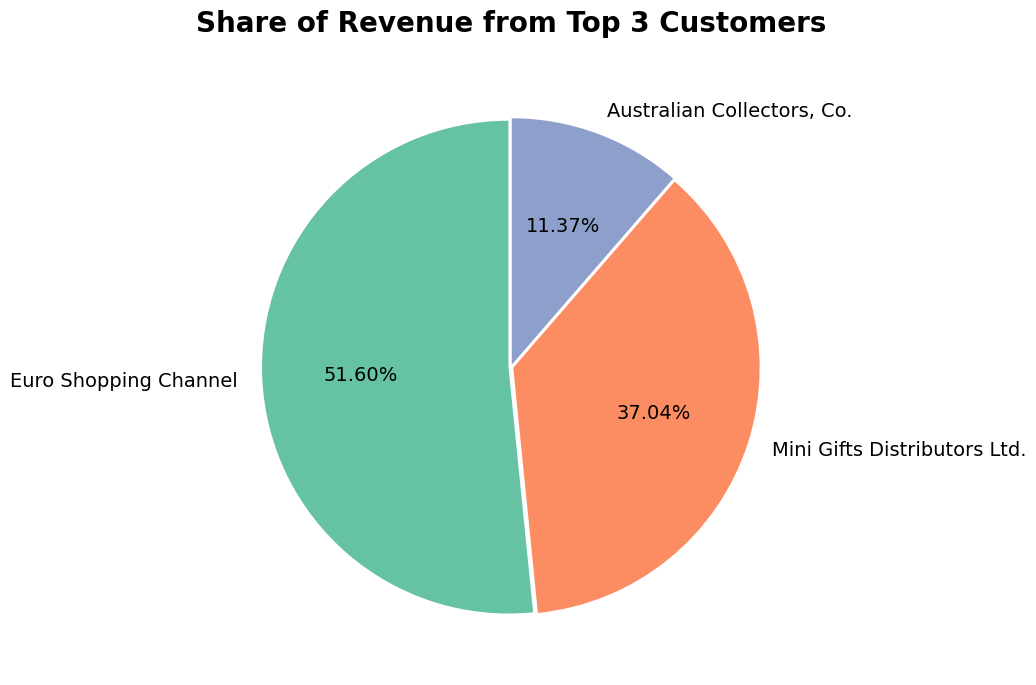

In [283]:
# get top 3 customers from top 10 list
top_3 = top_10.iloc[:3]
# get the total revenue of all top 3 customer sales put together
total = top_3['sales'].sum()

percentages = []
# get the percent of each customer of the total revenue from the 3
for value in top_3['sales'].tolist():
    percent = (value / total) * 100
    percentages.append(percent)

# set graph size
plt.figure(figsize=(11,8))

# set pie chart colors, font size and other settings
plt.pie(x=percentages, labels=top_3['customername'], autopct='%1.2f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.01, 0.01, 0.01],  textprops={'fontsize': 14})

# set pie chart title
plt.title('Share of Revenue from Top 3 Customers', pad=20, fontsize=20, fontweight='bold')

# save graph
plt.savefig('graphs/top_3_cust_rev.png')

plt.show()
    

## 8. How much of the total revenue is made from the top 10 customers?

In [291]:
total_rev = df['sales'].sum()
total_rev_top_10 = top_10['sales'].sum()
percent = round((total_rev_top_10 / total_rev) * 100,2)
percent

29.45

##### 29.45% of the total sales revenue comes from the top 10 customers

## 9. How many orders were cancelled? 

In [324]:
# getting total amount of orders
total_orders = df.shape[0]
# getting amount of rows only for cancelled orders
cancelled_orders = df[df['status'] == 'Cancelled'].shape[0]
cancelled_orders

60

In [314]:
total_orders

2823

#### Out of 2823 orders in total, 60 were cancelled

## 10. How much revenue was lost from cancelled orders?

In [336]:
lost_revenue = df.groupby('status')['sales'].sum()['Cancelled']
lost_revenue

194487.48

#### $194487.48 was lost from cancelled orders, assuming that cancelled orders were refunded